In [1]:
%matplotlib inline
import os 
import sys

import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt


In [2]:
DIR_RUN = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'tmp')

path_absgas = os.path.join(DIR_RUN, 'output_absgas.dat')

In [11]:
df = pd.read_csv(path_absgas, sep=r'\s+')
df = df.set_index(['v', 'ipt'])

ds = xr.Dataset.from_dataframe(df)
ds = ds.set_coords(['pressure', 'temperature'])

In [39]:
def quickplt(ipt=1):
    ds['absgas'].sel(ipt=ipt).to_dataframe().drop('ipt', axis=1)\
                .set_index(['pressure', 'temperature'], append=True)\
                .unstack([1, 2])\
                .plot(figsize=(8, 5),
                      logy=True, grid=True,
                      color='grey')

/nuwa_cluster/home/jackyu/locally_installed_python_pacakges/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


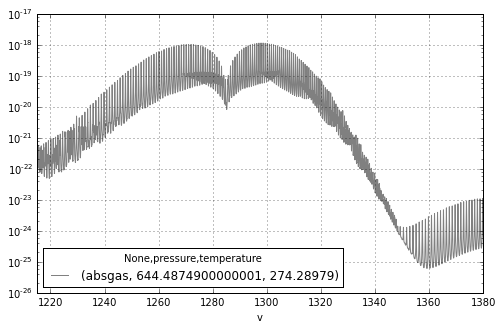

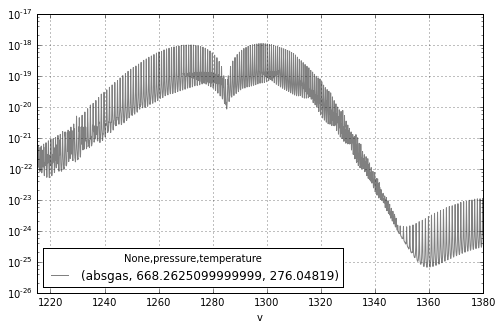

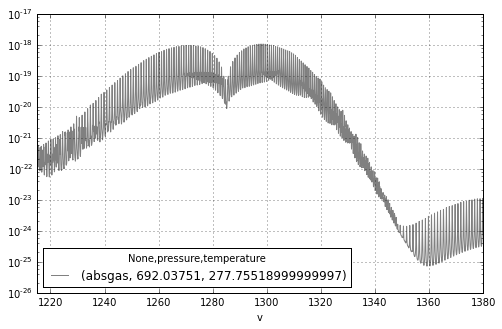

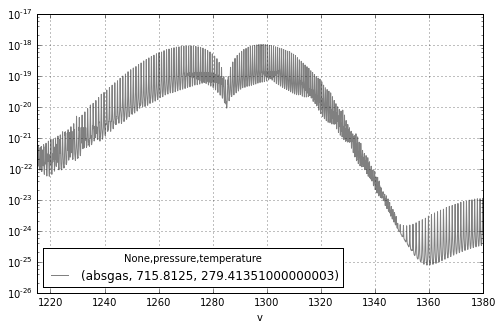

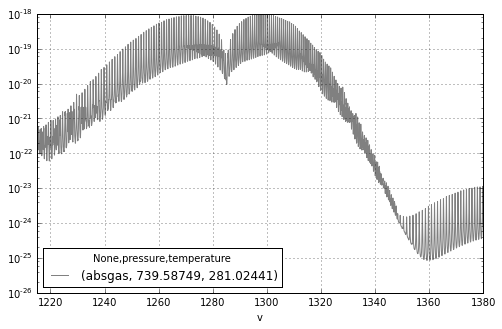

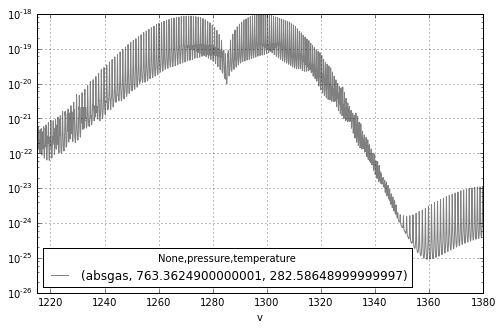

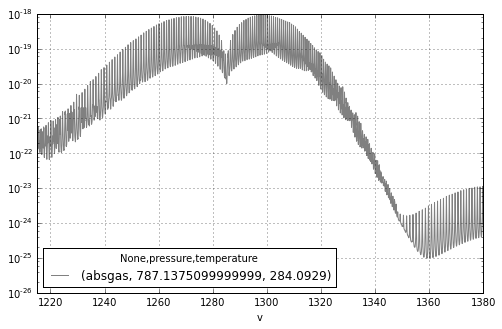

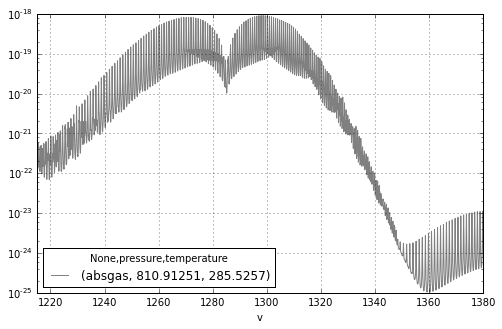

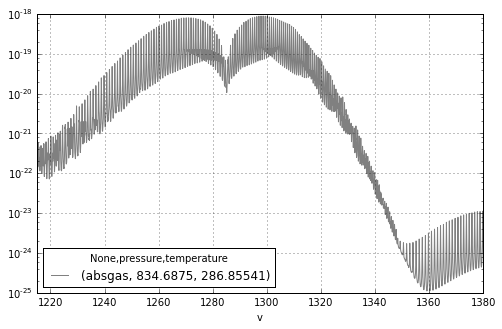

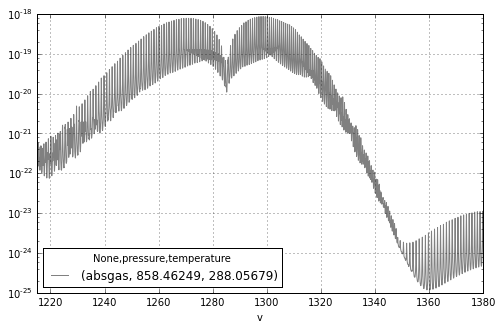

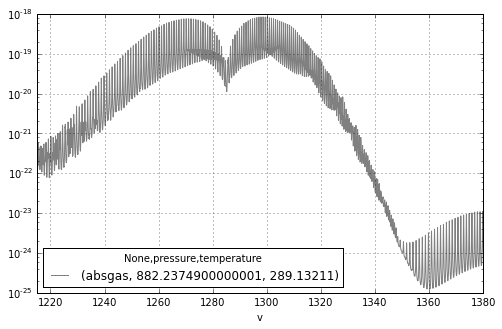

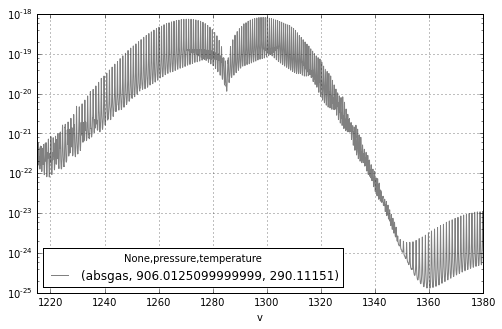

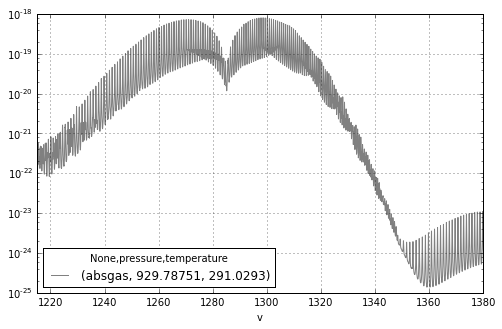

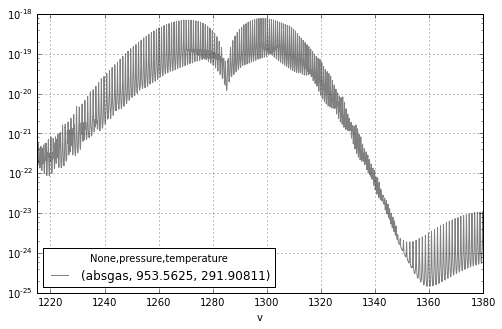

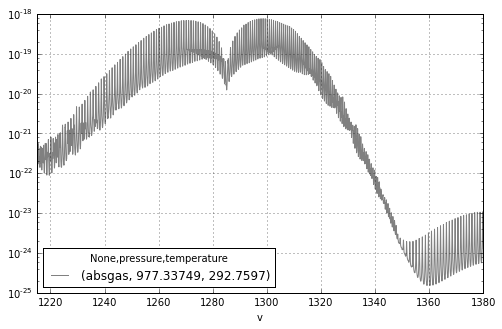

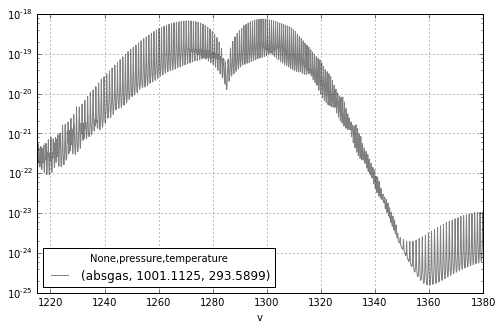

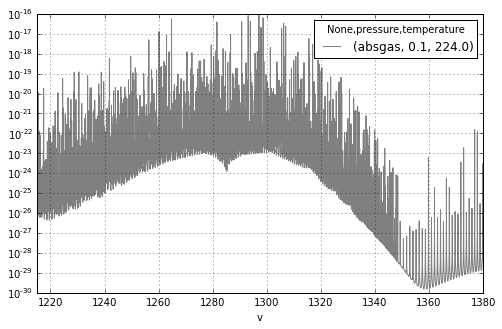

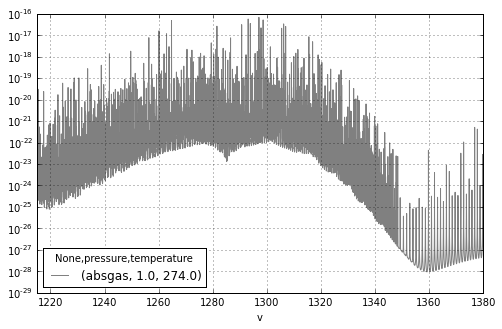

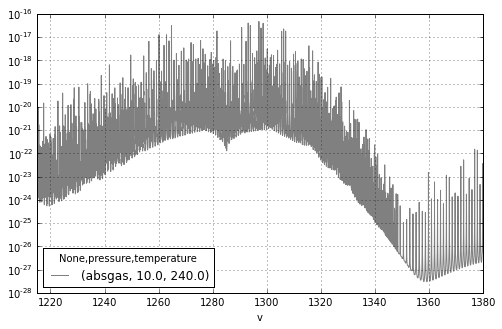

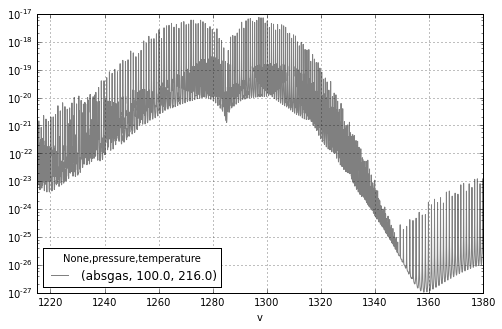

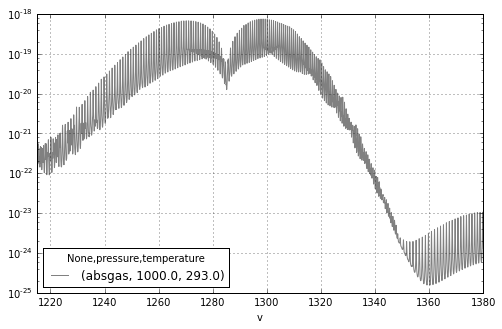

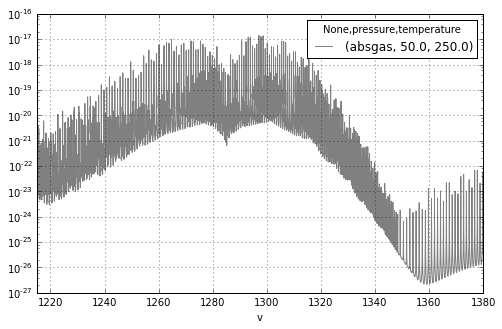

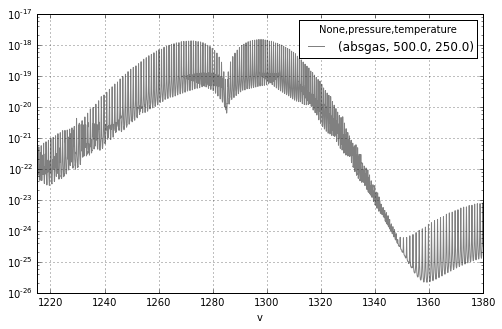

In [41]:
for ipt in range(60, 76 + 7):
    quickplt(ipt)